<a href="https://colab.research.google.com/github/Lucas-Buk/IMT/blob/main/Cancer_KMeans_%2B_TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bibliotecas e instalções**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# **Dicionário de variáveis**

*   **ESCOLARI**: Código para escolaridade do paciente (int = 1).

      1 – ANALFABETO

      2 – ENS. FUND. INCOMPLETO

      3 – ENS. FUND. COMPLETO

      4 – ENSINO MÉDIO

      5 – SUPERIOR

      9 – IGNORADA
*   **IDADE**: Idade do paciente (int = 3).
*   **SEXO**: Sexo do paciente (int = 1). 

      1 – MASCULINO

      2 – FEMININO
*   **UFNASC**: UF de nascimento (char = 2). Outras opções: SI - Sem informação; OP - Outro país.	
*   **UFRESID**: UF de residência (char = 2). Outras opções: OP - Outro país.
*   **IBGE**: Código da cidade de residência do paciente segundo IBGE com digito verificador (char = 7).
*   **CIDADE**: Cidade de residência do paciente (char = 200).
*   **CATEATEND**: Categoria de atendimento ao diagnóstico (int = 1). 

      1 - CONVENIO

      2 - SUS

      3 – PARTICULAR

      9 – SEM INFORMAÇÃO
*   **DTCONSULT**: Data da 1ª consulta (date = 10). Formato: DD/MM/YYYY	
*   **CLINICA**: Código da clinica (int = 2).

      1 – ALERGIA/IMUNOLOGIA

      2 – CIRURGIA CARDIACA

      3 – CIRURGIA CABEÇA E PESCOÇO

      4 – CIRURGIA GERAL

      5 – CIRURGIA PEDIATRICA

      6 – CIRURGIA PLASTICA

      7 – CIRURGIA TORAXICA

      8 – CIRURGIA VASCULAR

      9 – CLINICA MEDICA

      10 – DERMATOLOGIA

      11 – ENDOCRINOLOGIA

      12 – GASTROCIRURGIA
      
      13 – GASTROENTEROLOGIA
      
      14 – GERIATRIA
      
      15 – GINECOLOGIA
      
      16 – GINECOLOGIA / OBSTETRICIA
      
      17 – HEMATOLOGIA
      
      18 – INFECTOLOGIA
      
      19 – NEFROLOGIA
      
      20 – NEUROCIRURGIA
      
      21 – NEUROLOGIA
      
      22 – OFTALMOLOGIA
      
      23 – ONCOLOGIA CIRURGICA
      
      24 – ONCOLOGIA CLINICA
      
      25 – ONCOLOGIA PEDIATRICA
      
      26 – ORTOPEDIA
      
      27 – OTORRINOLARINGOLOGIA
      
      28 – PEDIATRIA
      
      29 – PNEUMOLOGIA
      
      30 – PROCTOLOGIA
      
      31 – RADIOTERAPIA
      
      32 – UROLOGIA
      
      33 – MASTOLOGIA
      
      34 – ONCOLOGIA CUTANEA
      
      35 – CIRURGIA PELVICA
      
      36 – CIRURGIA ABDOMINAL
      
      37 – ODONTOLOGIA
      
      38 – TRANSPLANTE HEPATICO
      
      99 – IGNORADO	
*   **DIAGPREV**: Diagnóstico e tratamento anterior (int = 1).

      1 – SEM DIAGNÓSTICO / SEM TRATAMENTO
      
      2 – COM DIAGNÓSTICO / SEM TRATAMENTO
      
      3 – COM DIAGNÓSTICO / COM TRATAMENTO
      
      4 – OUTROS	
*   **DTDIAG**: Data do diagnóstico (date = 10). Formato: DD/MM/YYYY	
*   **BASEDIAG**: Código da base do diagnóstico (int = 1).
      
      1 – EXAME CLINICO
      
      2 – RECURSOS AUXILIARES NÃO MICROSCÓPICOS
      
      3 – CONFIRMAÇÃO MICROSCÓPICA
      
      4 – SEM INFORMAÇÃO	
*   **TOPO**: Código da topografia (char = 4). Formato: C999 	
*   **TOPOGRUP**: Grupo da topografia	(char = 3). Formato: C99	
*   **DESCTOPO**: Descrição da Topografia (char = 80).
*   **MORFO**: Código da morfologia (char = 5). Formato: 99999
*   **DESCMORFO**: Descrição da morfologia (char = 80).
*   **EC**: Estádio clínico (char = 5).
*   **ECGRUP**: Grupo do estadiamento clínico (char = 3).

      0 - Tumores primários, classificados como in situ

      I - Tumores localizados

      II - Tumores com envolvimento regional por extensão direta

      III - Tumores com envolvimento regional de linfonodos
      
      IV - Tumores com metástase à distância 

      X - Para tumores não avaliados pelo profissional responsável ou sem informação sobre estadiamento anotada no prontuário

      Y - Para tumores em que não se aplica a classificação TNM. São os tumores não sólidos (por exemplo, as leucemias)
*   **T**: Classificação TNM - T (char = 5).
*   **N**: Classificação TNM - N (char = 5).	
*   **M**: Classificação TNM - M (char = 3).	
*   **PT**: Estadiamento pós cirúrgico (char = 5).
*   **PN**: Estadiamento pós cirúrgico (char = 5).	
*   **PM**: Estadiamento pós cirúrgico (char = 3).	
*   **S**: Classificação TNM - S (int = 1). Domínio: 0; 1; 2; 3; 8 – NÃO SE APLICA; 9 – X
*   **G**: Classificação TNM – G (Grau) (char = 5). 

      Domínio (exceto C40, C41, C381, C382, C383, C47, C48 e C49):
      0; 1; 2; 3; 4; 8 – NÃO SE APLICA; 9 – X

      Domínio (somente C40, C41, C381, C382, C383, C47, C48 e C49):
      ALTO; BAIXO; 8 – NÃO SE APLICA; 9 – X
	
*   **LOCALTNM**: Classificação TNM - Localização (int = 1).
      
      1 – SUPERIOR
      
      2 – MEDIO
      
      3 – INFERIOR
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **IDMITOTIC**: Classificação TNM – Índice Mitótico (int = 1).
      
      1 – ALTA
      
      2 – BAIXA
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **PSA**: Classificação TNM - PSA (int = 1).
      
      1 – MENOR QUE 10
      
      2 – MAIOR OU IGUAL A 10 E MENOR QUE 20
      
      3 – MAIOR OU IGUAL A 20
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **GLEASON**: Classificação TNM - Gleason (int = 1).
      
      1 – MENOR OU IGUAL A 6
      
      2 – IGUAL A 7
      
      3 – MAIOR OU IGUAL A 8
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **OUTRACLA**: Outra classificação de estadiamento (char = 20).
*   **META01**: Metástase (char = 3).	Formato: C99
*   **META02**: Metástase (char = 3).	Formato: C99
*   **META03**: Metástase (char = 3).	Formato: C99
*   **META04**: Metástase (char = 3).	Formato: C99
*   **DTTRAT**: Data de inicio do tratamento (date = 10). Formato: DD/MM/YYYY	
*   **NAOTRAT**: Código da razão para não realização do tratamento (int = 1).
      
      1 – RECUSA DO TRATAMENTO
      
      2 – DOENÇA AVANÇADA, FALTA DE CONDIÇÕES CLINICAS
      
      3 – OUTRAS DOENÇAS ASSOCIADAS
      
      4 – ABANDONO DE TRATAMENTO
      
      5 – OBITO POR CANCER
      
      6 – OBITO POR OUTRAS CAUSAS, SOE
      
      7 – OUTRAS
      
      8 – NÃO SE APLICA (CASO TENHA TRATAMENTO)
      
      9 – SEM INFORMAÇÃO	
*   **TRATAMENTO**: Código de combinação dos tratamentos realizados (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado	
*   **TRATHOSP**: Código de combinação dos tratamentos realizados no hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento

      J – Nenhum tratamento realizado	
*   **TRATFANTES**: Código de combinação dos tratamentos realizados antes/durante admissão fora do hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado
      
      K – Sem informação
*   **TRATFAPOS**: Código de combinação dos tratamentos realizados após admissão fora do hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado
      
      K – Sem informação
*   **NENHUM**: Tratamento recebido no hospital = nenhum (int = 1). 0 – NÃO; 1 – SIM
*   **CIRURGIA**: Tratamento recebido no hospital = cirurgia (int = 1). 0 – NÃO; 1 – SIM
*   **RADIO**: Tratamento recebido no hospital = radioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **QUIMIO**: Tratamento recebido no hospital = quimioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **HORMONIO**: Tratamento recebido no hospital = hormonioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **TMO**: Tratamento recebido no hospital = tmo (int = 1). 0 – NÃO; 1 – SIM
*   **IMUNO**: Tratamento recebido no hospital = imunoterapia (int = 1). 0 – NÃO; 1 – SIM
*   **OUTROS**: Tratamento recebido no hospital = outros (int = 1). 0 – NÃO; 1 – SIM
*   **NENHUMANT**: Tratamento recebido fora do hospital e antes da admissão = nenhum (int = 1). 0 – NÃO; 1 – SIM
*   **CIRURANT**: Tratamento recebido fora do hospital e antes da admissão = cirurgia (int = 1). 0 – NÃO; 1 – SIM
*   **RADIOANT**: Tratamento recebido fora do hospital e antes da admissão = radioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **QUIMIOANT**: Tratamento recebido fora do hospital e antes da admissão = quimioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **HORMOANT**: Tratamento recebido fora do hospital e antes da admissão = hormonioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **TMOANT**: Tratamento recebido fora do hospital e antes da admissão = tmo (int = 1). 0 – NÃO; 1 – SIM
*   **IMUNOANT**: Tratamento recebido fora do hospital e antes da admissão = imunoterapia (int = 1). 0 – NÃO; 1 – SIM
*   **OUTROANT**: Tratamento recebido fora do hospital e antes da admissão = outros (int = 1). 0 – NÃO; 1 – SIM	
*   **NENHUMAPOS**: Tratamento recebido fora do hospital e durante/após admissão = nenhum	(int = 1). 0 – NÃO; 1 – SIM	
*   **CIRURAPOS**: Tratamento recebido fora do hospital e durante/após admissão = cirurgia	(int = 1). 0 – NÃO; 1 – SIM	
*   **RADIOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = radioterapia	(int = 1). 0 – NÃO; 1 – SIM	
*   **QUIMIOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = quimioterapia	(int = 1). 0 – NÃO; 1 – SIM		
*   **HORMOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = hormonioterapia	(int = 1). 0 – NÃO; 1 – SIM		
*   **TMOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = tmo	(int = 1). 0 – NÃO; 1 – SIM		
*   **IMUNOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = imunoterapia	(int = 1). 0 – NÃO; 1 – SIM	
*   **OUTROAPOS**: Tratamento recebido fora do hospital e durante/após admissão = outros	(int = 1). 0 – NÃO; 1 – SIM	
*   **DTULTINFO**: Data da última informação do paciente (date = 10). Formato: DD/MM/YYYY
*   **ULTINFO**: Última informação sobre o paciente (int = 1).
      
      1 – VIVO, COM CÂNCER
      
      2 – VIVO, SOE
      
      3 – OBITO POR CANCER
      
      4 – OBITO POR OUTRAS CAUSAS, SOE
*   **CONSDIAG**: Diferença em dias entre as datas de consulta o diagnóstico (num = dias).
*   **TRATCONS**: Diferença em dias entre as datas de consulta e tratamento (num = dias).	
*   **DIAGTRAT**: Diferença em dias entre as datas de tratamento e diagnóstico (num = dias).
*   **ANODIAG**: Ano de diagnóstico (int = 4). Formato: 9999
*   **CICI**: Tumor infantil (char = 5).	
*   **CICIGRUP**: Tumor infantil – Grupo (char = 80).	
*   **CICISUBGRU**: Tumor infantil – Sub grupo (char = 80).	
*   **FAIXAETAR**: Faixa etária do paciente (char = 5).	
*   **LATERALI**: Lateralidade (int = 1).
      
      1 – DIREITA
      
      2 – ESQUERDA
      
      3 – BILATERAL
      
      8 - NÃO SE APLICA	
*   **INSTORIG**: Instituição de origem (char = 200). Obrigatório somente se DIAGPREV = 03 – COM DIAGNÓSTICO / COM TRATAMENTO
*   **DRS**: DRS (char = 200).
*   **RRAS**: RRAS (char = 200).	
*   **PERDASEG**: Perda de seguimento (int = 1). 
      
      0 – Não
      
      1 – Sim
      
      8 – Não se aplica (excluído do cálculo para o indicador perda de seguimento)	
*   **ERRO**: Admissão com erro (int = 1). 0 – Sem; 1 – Com
*   **DTRECIDIVA**: Data da última ocorrência de recidiva (date = 10). Formato: DD/MM/YYYY	
*   **RECNENHUM**: Sem recidiva (int = 1). 0 - Não; 1 - Sim
*   **RECLOCAL**: Recidiva local (int = 1). 0 - Não; 1 - Sim	
*   **RECREGIO**: Recidiva regional (int = 1). 0 - Não; 1 - Sim	
*   **RECDIST**: Recidiva a distância / metástase (int = 1). 0 - Não; 1 - Sim	
*   **REC01**: Local da recidiva/metástase (char = 3). Formato: C99 
*   **REC02**: Local da recidiva/metástase (char = 3). Formato: C99 	
*   **REC03**: Local da recidiva/metástase (char = 3). Formato: C99 
*   **REC04**: Local da recidiva/metástase (char = 3). Formato: C99 	
*   **IBGEATEN**: Código IBGE da instituição (int = 7).	
*   **CIDO**: Código da morfologia 3ª Edição (int = 5). Formato: 99999	
*   **DSCCIDO**: Descrição da morfologia 3ª Edição (char = 89).




# **Dados do KMeans**

In [ ]:
df_kmeans = pd.read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/df_kmeans1.csv')
print(df_kmeans.shape)
df_kmeans.head(3)

(868763, 55)


,ESCOLARI,IDADE,SEXO,CATEATEND,DIAGPREV,BASEDIAG,TOPOGRUP,MORFO,ECGRUP,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,LATERALI,RRAS,PERDASEG,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,TOPOGRUPO,META,REC,CICIGRUPO,GRUPO
0,4,40.0,2,9,1,3,C53,81402,0,8,8,8,8,8,8,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,7,95.0,88.0,2000,8,15,1,1,0,0,0,45,0,0,0,3
1,9,45.0,2,9,1,3,C53,80703,3,8,8,8,8,8,8,6,6,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,12,15.0,3.0,2000,8,15,0,1,0,0,0,45,0,0,0,2
2,2,63.0,2,9,1,3,C53,80703,3,8,8,8,8,8,8,2,2,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,6,15.0,9.0,2000,8,15,0,1,0,0,0,45,0,0,0,6


In [ ]:
k = len(df_kmeans.GRUPO.unique())
k # number of clusters

16

In [ ]:
dict_grup = {}
for i in range(0, k):
  dict_grup[i] = df_kmeans[df_kmeans.GRUPO == i]

dict_grup[0].head(3) # Grupo 0

,ESCOLARI,IDADE,SEXO,CATEATEND,DIAGPREV,BASEDIAG,TOPOGRUP,MORFO,ECGRUP,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,LATERALI,RRAS,PERDASEG,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,TOPOGRUPO,META,REC,CICIGRUPO,GRUPO
6526,2,57.0,2,9,1,3,C50,85012,0,8,8,8,8,8,8,9,9,0,9,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,54,109.0,55.0,2008,2,15,1,1,0,0,0,42,0,0,0,0
6542,2,56.0,2,9,1,3,C50,85202,0,8,8,8,8,8,8,9,9,0,9,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,35,35.0,0.0,2008,2,14,1,1,0,0,0,42,0,0,0,0
7288,9,46.0,2,9,1,3,C50,82012,0,8,8,8,8,8,8,9,4,0,9,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,158,224.0,66.0,2009,2,16,1,1,0,0,0,42,0,0,0,0


In [ ]:
df_kmeans.shape

(868763, 55)

In [ ]:
df_kmeans.GRUPO.value_counts()

10    159471
2     146761
6     132717
3      84270
4      73912
13     64195
12     46443
15     31396
5      25945
8      25515
11     21441
14     20849
9      19997
0       8211
1       3945
7       3695
Name: GRUPO, dtype: int64

In [ ]:
n_samples = 10000 # samples from dataset

df_subset = df_kmeans.sample(n_samples, random_state=7).sort_index().copy()
df_subset.GRUPO.value_counts()

10    1839
2     1680
6     1505
3      985
4      873
13     723
12     549
15     349
5      314
8      282
14     263
9      254
11     229
0       81
1       38
7       36
Name: GRUPO, dtype: int64

In [ ]:
cols = df_kmeans.columns
cols = cols.drop(['TOPOGRUP','GRUPO'])
len(cols)

53

In [ ]:
df_subset[cols].shape

(10000, 53)

# **Normalização**



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df_subset[cols].values
X.shape

(10000, 53)

In [ ]:
ss = StandardScaler()
X_norm = ss.fit_transform(X)

In [ ]:
pd.DataFrame(data=X_norm, columns=cols).describe()

,ESCOLARI,IDADE,SEXO,CATEATEND,DIAGPREV,BASEDIAG,MORFO,ECGRUP,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,LATERALI,RRAS,PERDASEG,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,TOPOGRUPO,META,REC,CICIGRUPO
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-1.727551e-15,7.054912e-17,-3.919576e-15,-4.598832e-15,3.237011e-15,-3.191586e-16,2.920109e-16,1.353395e-15,-2.325418e-15,2.774207e-15,-1.600686e-15,3.898243e-15,3.580769e-15,-3.085631e-15,4.654277e-16,-5.413670e-16,0.0,-1.579220e-15,3.236622e-15,-5.027578e-15,-2.562839e-16,1.578515e-16,-1.302936e-15,-1.088199e-15,-2.667785e-15,-5.959333e-15,6.099748e-15,0.0,0.0,-9.876655e-16,-3.794454e-15,-2.475004e-15,1.050807e-15,-1.638795e-15,-1.523347e-16,-1.745668e-15,-2.007108e-15,-1.464628e-15,-6.589951e-16,-5.730208e-16,-5.087042e-16,-8.272538e-15,6.958545e-16,-5.333955e-15,-1.187478e-14,-1.146941e-14,5.358508e-15,2.235434e-17,8.004208e-15,2.300160e-16,1.708589e-15,3.460493e-15,3.528400e-15
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.0,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.0,0.0,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.161384e+00,-3.511352e+00,-1.011668e+00,-1.093733e+00,-7.696471e-01,-9.353145e+00,-8.010893e-01,-1.142047e+00,-7.199125e+00,-2.062678e+01,-6.046254e+01,-6.148232e+00,-6.276020e+00,-9.801479e+01,-9.530922e-01,-1.244839e+00,0.0,-1.779492e-01,-7.229925e-02,-1.453395e+00,-6.285613e-01,-7.724499e-01,-3.914965e-01,-6.337243e-02,-8.515994e-02,-2.754038e-01,-4.081258e+01,0.0,0.0,-3.958114e+00,-6.176160e-02,-1.818182e-01,-9.203889e-02,-3.607897e-02,-1.414355e-02,-1.000050e-02,-8.396038e-02,-1.622719e+00,-3.383699e-01,-4.761294e-01,-4.923560e-01,-1.954656e+00,-2.376558e+00,-6.296163e-01,-4.680451e-01,-3.149132e+00,-2.078172e-01,-1.706582e-01,-1.656274e-01,-2.643672e+00,-3.122467e-01,-2.416149e-01,-1.314695e-01
25%,-8.205621e-01,-5.594006e-01,-1.011668e+00,-8.116174e-01,-7.696471e-01,4.133572e-02,-6.304237e-01,-7.694987e-01,1.557124e-01,5.228849e-02,1.727995e-02,1.733931e-01,1.775658e-01,1.260352e-02,-9.530922e-01,-9.238884e-01,0.0,-1.779492e-01,-7.229925e-02,-1.453395e+00,-6.285613e-01,-7.724499e-01,-3.914965e-01,-6.337243e-02,-8.515994e-02,-2.754038e-01,2.450225e-02,0.0,0.0,2.526456e-01,-6.176160e-02,-1.818182e-01,-9.203889e-02,-3.607897e-02,-1.414355e-02,-1.000050e-02,-8.396038e-02,-4.592293e-01,-3.188910e-01,-3.949643e-01,-4.923560e-01,-8.161872e-01,4.564359e-01,-4.185311e-01,-4.680451e-01,3.175478e-01,-2.078172e-01,-1.706582e-01,-1.656274e-01,-5.131140e-01,-3.122467e-01,-2.416149e-01,-1.314695e-01
50%,-4.797405e-01,1.490676e-01,9.884665e-01,-8.116174e-01,-7.696471e-01,4.133572e-02,-4.907480e-01

# **PCA e TSNE**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_norm)

df_subset['pca_one'] = pca_result[:,0]
df_subset['pca_two'] = pca_result[:,1]

print('Cumulative explained variation for 2 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation for 2 principal components: 0.14045772785465843


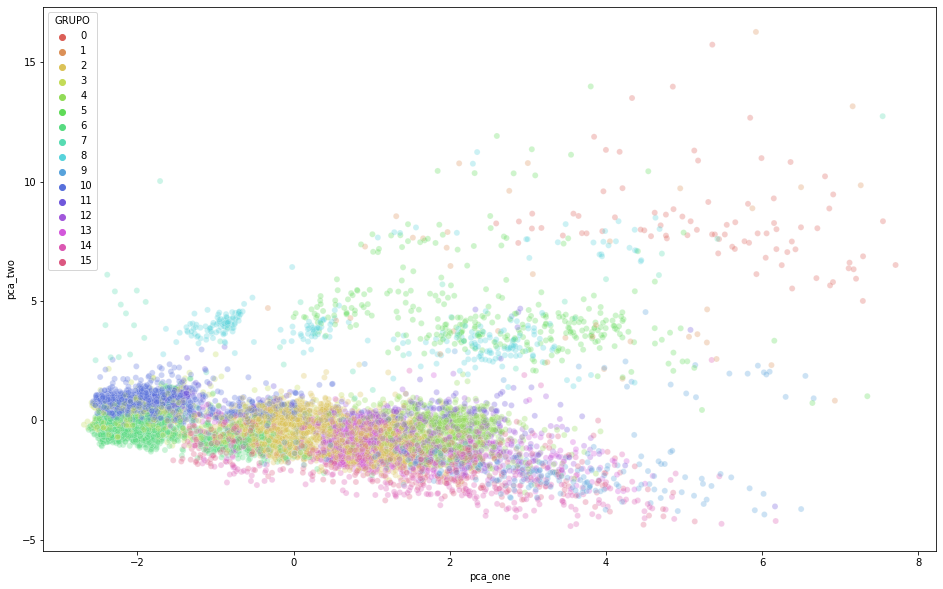

In [ ]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="pca_one", y="pca_two",
    hue="GRUPO",
    palette=sns.color_palette("hls", k),
    data=df_subset,
    legend="full",
    alpha=0.3
)

plt.show()

In [ ]:
pca_50 = PCA(n_components=50)

pca_result_50 = pca_50.fit_transform(X_norm)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9999999999999999


In [ ]:
tsne = TSNE(n_components=2, random_state=7, perplexity=50)
tsne_pca_results = tsne.fit_transform(pca_result_50)

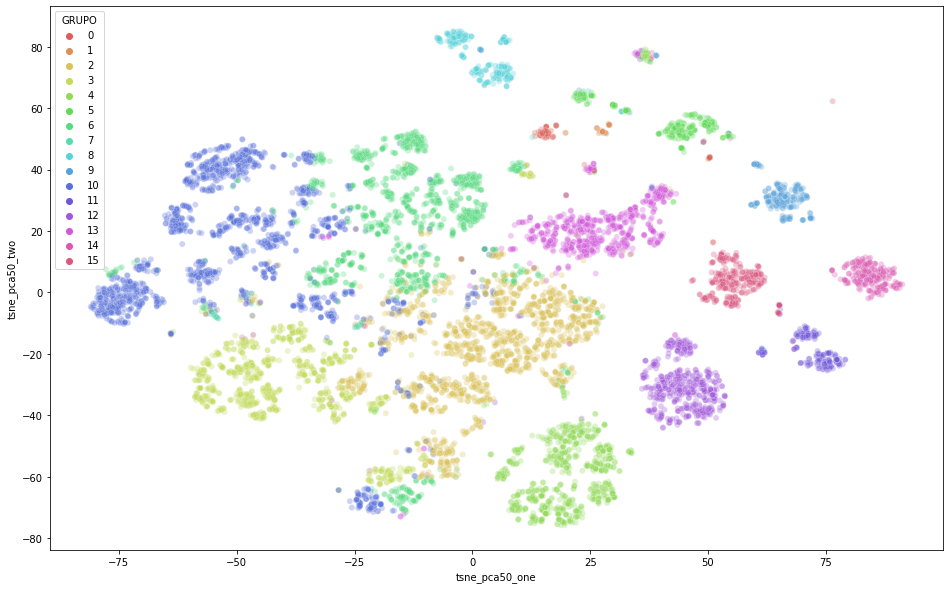

In [ ]:
df_subset['tsne_pca50_one'] = tsne_pca_results[:,0]
df_subset['tsne_pca50_two'] = tsne_pca_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_pca50_one", y="tsne_pca50_two",
    hue="GRUPO",
    palette=sns.color_palette("hls", k),
    data=df_subset,
    legend="full",
    alpha=0.3
)

plt.show()

In [ ]:
df_subset.to_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/df_tsne1.csv', encoding='utf-8', index=False)

# **Dados do KMeans - df_full**

In [ ]:
df_full = pd.read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/df_kmeans2.csv')
print(df_full.shape)
df_full.head(3)

(943659, 55)


,ESCOLARI,IDADE,SEXO,CATEATEND,DIAGPREV,BASEDIAG,TOPOGRUP,MORFO,ECGRUP,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,LATERALI,RRAS,PERDASEG,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,TOPOGRUPO,META,REC,CICIGRUPO,GRUPO
0,4,40.0,2,9,1,3,C53,81402,0,8,8,8,8,8,8,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,7,95.0,88.0,2000,8,15,1,1,0,0,0,45,0,0,0,0
1,9,45.0,2,9,1,3,C53,80703,3,8,8,8,8,8,8,6,6,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,12,15.0,3.0,2000,8,15,0,1,0,0,0,45,0,0,0,11
2,2,63.0,2,9,1,3,C53,80703,3,8,8,8,8,8,8,2,2,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,6,15.0,9.0,2000,8,15,0,1,0,0,0,45,0,0,0,14


In [ ]:
k = len(df_full.GRUPO.unique())
k # number of clusters

20

In [ ]:
dict_grup_full = {}
for i in range(0, k):
  dict_grup_full[i] = df_full[df_full.GRUPO == i]

In [ ]:
# Grupo 0
dict_grup_full[0].head()

,ESCOLARI,IDADE,SEXO,CATEATEND,DIAGPREV,BASEDIAG,TOPOGRUP,MORFO,ECGRUP,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,LATERALI,RRAS,PERDASEG,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,TOPOGRUPO,META,REC,CICIGRUPO,GRUPO
0,4,40.0,2,9,1,3,C53,81402,0,8,8,8,8,8,8,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,7,95.0,88.0,2000,8,15,1,1,0,0,0,45,0,0,0,0
4,1,48.0,2,9,2,3,C53,80703,3,8,8,8,8,8,8,2,2,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,0,132.0,132.0,2000,8,15,1,1,0,0,0,45,0,0,0,0
6,9,65.0,2,2,1,3,C54,81403,2,8,8,8,8,8,8,4,4,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,13,76.0,63.0,2000,8,15,1,1,0,0,0,46,0,0,0,0
7,9,80.0,2,2,1,3,C50,84803,2,8,8,8,8,8,8,4,4,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,8,98.0,90.0,2014,1,15,1,1,0,0,0,42,0,0,0,0
8,2,38.0,2,9,1,3,C50,80102,0,8,8,8,8,8,8,4,4,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,13,64.0,51.0,2000,8,15,1,1,0,0,0,42,0,0,0,0


In [ ]:
df_full.shape

(943659, 55)

In [ ]:
df_full.GRUPO.value_counts()

3     146932
11    135665
14    125078
0      77648
15     68551
19     59036
2      54415
18     46396
10     35060
12     30243
13     27707
17     27651
9      22835
7      20847
6      19992
16     13183
1      12771
8       9534
5       6237
4       3878
Name: GRUPO, dtype: int64

In [ ]:
n_samples = 10000 # samples from dataset

df_subset_full = df_full.sample(n_samples, random_state=7).sort_index().copy()
df_subset_full.GRUPO.value_counts()

3     1550
11    1447
14    1281
0      818
15     720
19     624
2      615
18     465
10     363
17     318
13     296
12     296
9      246
7      237
6      225
16     154
1      142
8      105
5       61
4       37
Name: GRUPO, dtype: int64

In [ ]:
cols = df_full.columns
cols = cols.drop(['TOPOGRUP','GRUPO'])
len(cols)

53

In [ ]:
df_subset_full[cols].shape

(10000, 53)

# **Normalização**



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df_subset_full[cols].values
X.shape

(10000, 53)

In [ ]:
ss = StandardScaler()
X_norm = ss.fit_transform(X)

# **PCA e TSNE**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_norm)

df_subset_full['pca_one'] = pca_result[:,0]
df_subset_full['pca_two'] = pca_result[:,1]

print('Cumulative explained variation for 2 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation for 2 principal components: 0.14018729555295878


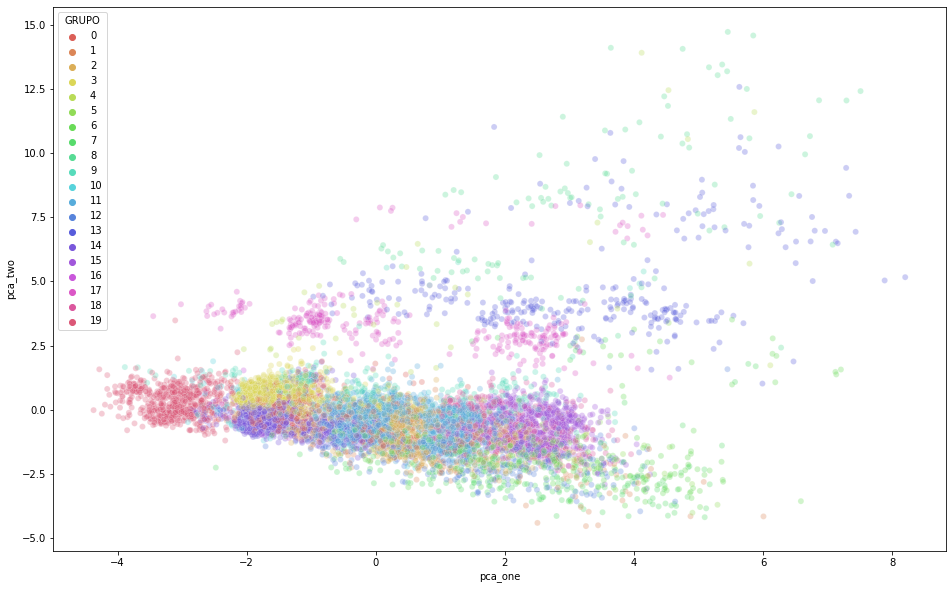

In [ ]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="pca_one", y="pca_two",
    hue="GRUPO",
    palette=sns.color_palette("hls", k),
    data=df_subset_full,
    legend="full",
    alpha=0.3
)

plt.show()

In [ ]:
pca_50 = PCA(n_components=50)

pca_result_50 = pca_50.fit_transform(X_norm)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 1.0


In [ ]:
tsne = TSNE(n_components=2, random_state=7, perplexity=50)
tsne_pca_results = tsne.fit_transform(pca_result_50)

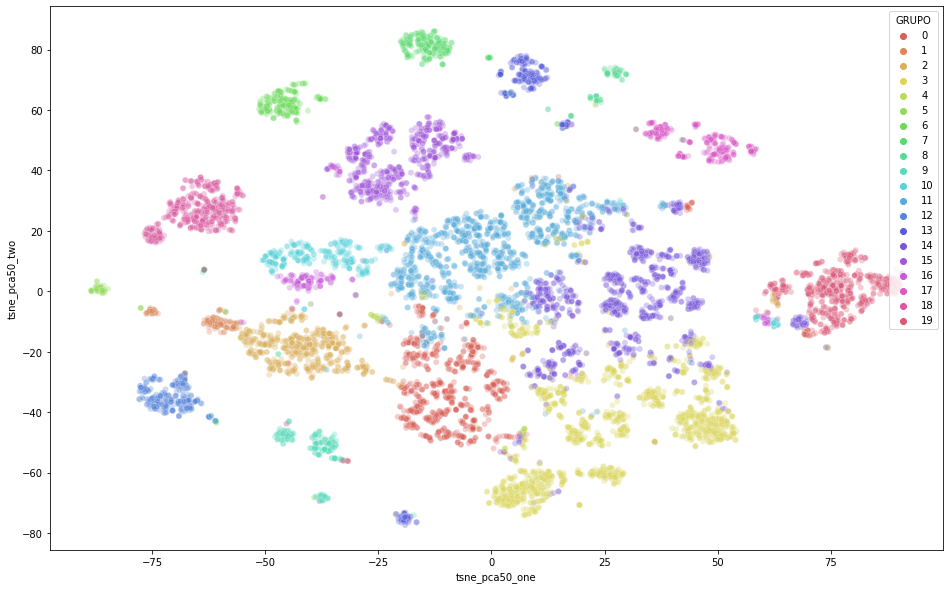

In [ ]:
df_subset_full['tsne_pca50_one'] = tsne_pca_results[:,0]
df_subset_full['tsne_pca50_two'] = tsne_pca_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_pca50_one", y="tsne_pca50_two",
    hue="GRUPO",
    palette=sns.color_palette("hls", k),
    data=df_subset_full,
    legend="full",
    alpha=0.3
)

plt.show()

In [ ]:
df_subset_full.to_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/df_tsne2.csv', encoding='utf-8', index=False)

# **Referências**

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

https://medium.com/@violante.andre/an-introduction-to-t-sne-with-python-example-47e6ae7dc58f

https://towardsdatascience.com/t-sne-python-example-1ded9953f26

https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b